#我的神經網路

我要做的是 6 層深度學習, 因此設第一層 N1 神經元, 第二層 N2, 第三層 N3, 第四層 N4, 第五層 N5, 第六層 N6

In [1]:
N1 = 35
N2 = 30
N3 = 25
N4 = 25
N5 = 20
N6 = 15

## 1. 讀入套件

在這裡讀入一些套件,安裝Gradio套件。

In [ ]:
!pip install gradio

In [2]:
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio
import gradio as gr

MNIST 資料集
- 描述：28x28 (784像素) 的手繪數字灰階影像，數字範圍從 0 到 9
- 訓練集：形狀為 (28000,28,28)(28000, 28, 28)
- 標籤：(28000,)
- 測試集：形狀為 (784,28,28)(784, 28, 28)
- 標籤：(784,)(784,)
- 資料來源：[Kaggle MNIST 手寫數字資料集](https://www.kaggle.com/competitions/digit-recognizer/overview)

### 2.1 由 Keras 讀入 MNIST

準備好在Keras中讀MNIST數據庫

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


看看訓練資料、測試資料總筆數

In [4]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


### 2.2 數據庫的內容

看看訓練資料的輸入(圖檔,矩陣)、輸出的部份長什麼樣子

In [5]:
def show_xy(n=0):
    ax = plt.gca()
    X = x_train[n]
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(X, cmap = 'Greys')
    print(f'本資料 y 給定的答案為: {y_train[n]}')

In [6]:
interact_manual(show_xy, n=(0,59999));

interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

In [7]:
def show_data(n = 100):
    X = x_train[n]
    print(X)

In [8]:
interact_manual(show_data, n=(0,59999));

interactive(children=(IntSlider(value=100, description='n', max=59999), Button(description='Run Interact', sty…

### 2.3 輸入格式整理
把原來的每筆數據是個28x28的矩陣用 `reshape` 調校成「平平的」28x28=784長的向量

In [9]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

### 2.4 輸出格式整理
因為函數
$$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}$$
可能會得到的總會有點誤差，例如：
$$\hat{f}(x) = 0.5$$
有可能是0,也有可能是1<br>
所以要做 "1-hot enconding"，例如：
- 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 1]

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

看看某數據的答案

In [11]:
n = 87
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## 3. 打造神經網路

### 3.1 決定神經網路架構、讀入相關套件

讀入Dense, LeakyReLU, PReLU, ELU

In [12]:
from keras.layers import Dense, LeakyReLU, PReLU, ELU

### 3.2 建構神經網路

建構標準一層一層傳遞的神經網路 `Sequential`, 打開一個空的神經網路

In [13]:
model = Sequential()

用 `add` 去加一層, 從第一個隱藏層開始，告訴TensorFlow輸入有 784 個 features

ReLU function:
$$f(x)=max(0,x)$$
<br>
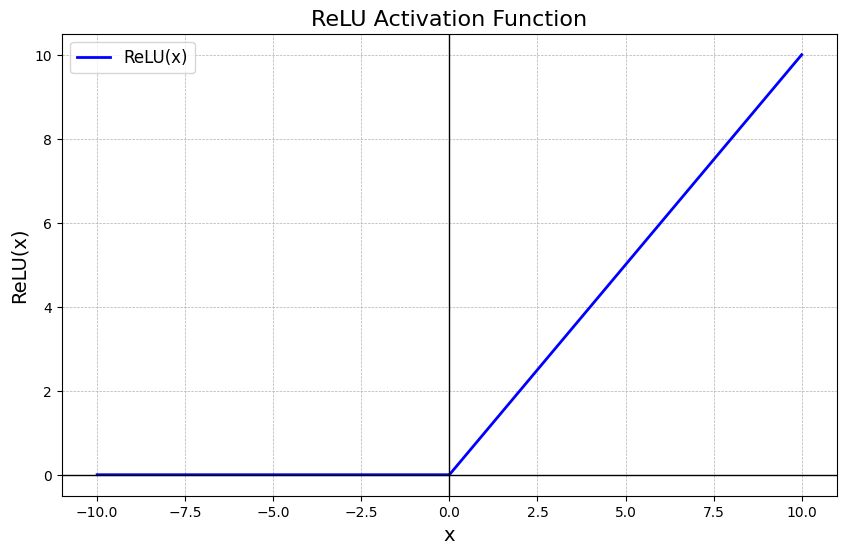

In [14]:
model.add(Dense(N1, input_dim=784, activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


第二層開始就不用再說明輸入神經元個數 (因為就是前一層神經元數)

In [15]:
model.add(Dense(N2, activation='relu'))

In [ ]:
#test1

In [ ]:
#model.add(Dense(N2, activation='relu'))    N2=25

In [ ]:
#model.add(Dense(N3, activation='relu'))    N3=25

In [ ]:
#model.add(Dense(N4, activation='relu'))    N4=25

In [ ]:
#model.add(Dense(N5, activation='relu'))    N5=25

In [ ]:
#model.add(Dense(N6, activation='relu'))    N6=25

LeakyReLU function:
$$
f(x)=
\begin{cases}
x, \quad if \quad x\geq0\\
negative\_slope×x, \quad  otherwise
\end{cases}
$$
<br>$$or$$<br>
$$
f(x)=max(0,x)+negative\_slope∗min(0,x)
$$
<br>
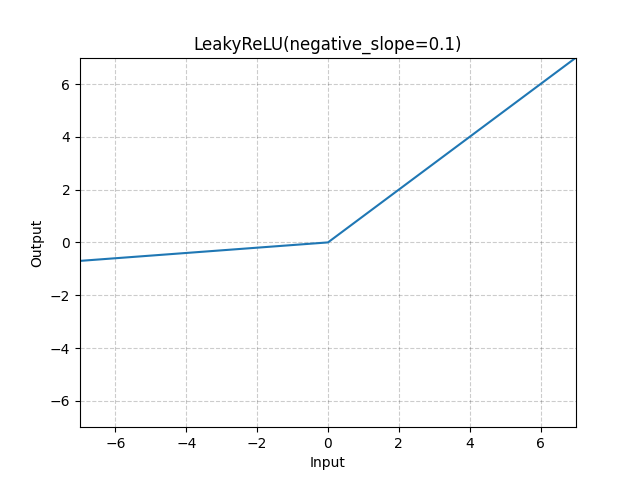

In [ ]:
'''test2
model.add(Dense(N3, input_dim=784))
model.add(LeakyReLU(alpha=0.1))
'''

In [16]:
model.add(Dense(N3))
model.add(LeakyReLU(alpha=0.1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


PReLU function:
$$
f(x)=
\begin{cases}
x, \quad if \quad x\geq0\\
ax, \quad  otherwise
\end{cases}
$$
<br>$$or$$<br>
$$
f(x)=max(0,x)+a*min(0,x)
$$
<br>
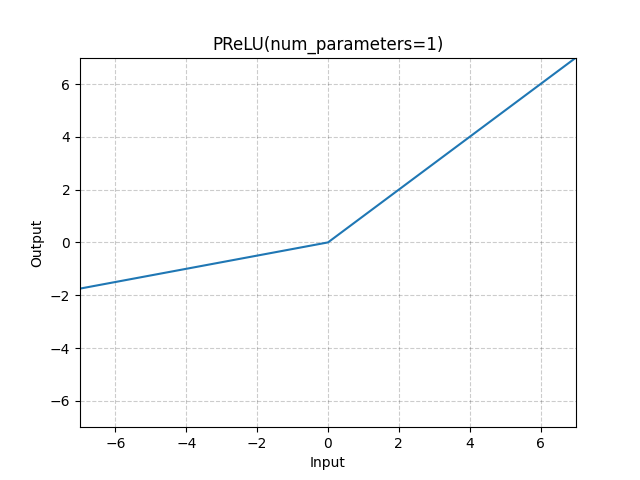

In [ ]:
'''test2
model.add(Dense(N4, input_dim=784))
model.add(PReLU())
'''

In [17]:
model.add(Dense(N4))
model.add(PReLU())

Elu function:
$$
f(x)=
\begin{cases}
x, \quad if \quad x>0\\
\alpha *(exp(x)-1), \quad if \quad x\leq0  
\end{cases}
$$
<br>

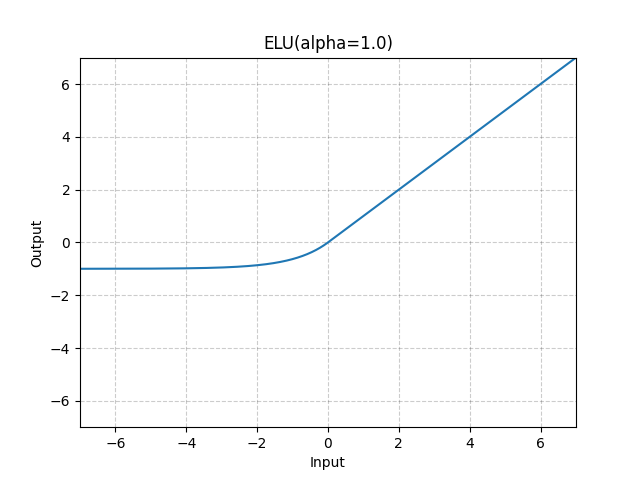

In [ ]:
#model.add(Dense(N5, input_dim=784, activation='elu')) test2

In [18]:
model.add(Dense(N5,activation='elu'))

Selu function:
$$f(x)=scale*(max(0,x)+min(0,\alpha*(exp(x)-1)))$$
<br>
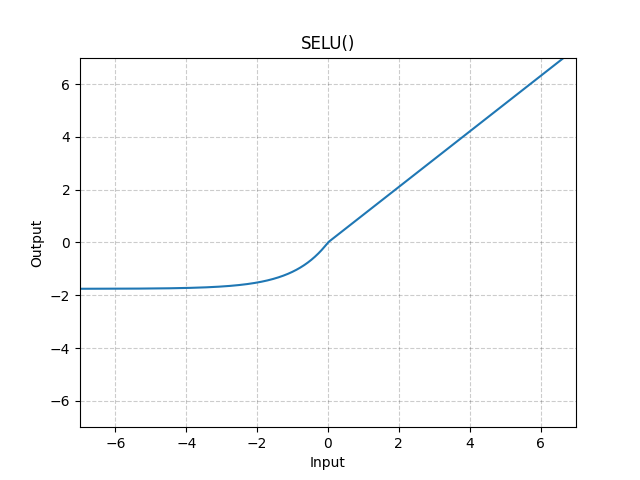

In [ ]:
#model.add(Dense(N6, input_dim=784, activation='selu')) test2

In [19]:
model.add(Dense(N6,activation='selu'))

輸出有 10 個數字, 所以輸出層的神經元是 10 個，網路輸出是

$$(y_1, y_2, \ldots, y_{10})$$

希望是

$$\sum_{i=1}^{10} y_i = 1$$

所以用 `softmax`

Softmax function:
$$
f(x)={exp(x_i)}\over{\sum_j exp(x_i)}
$$
<br>
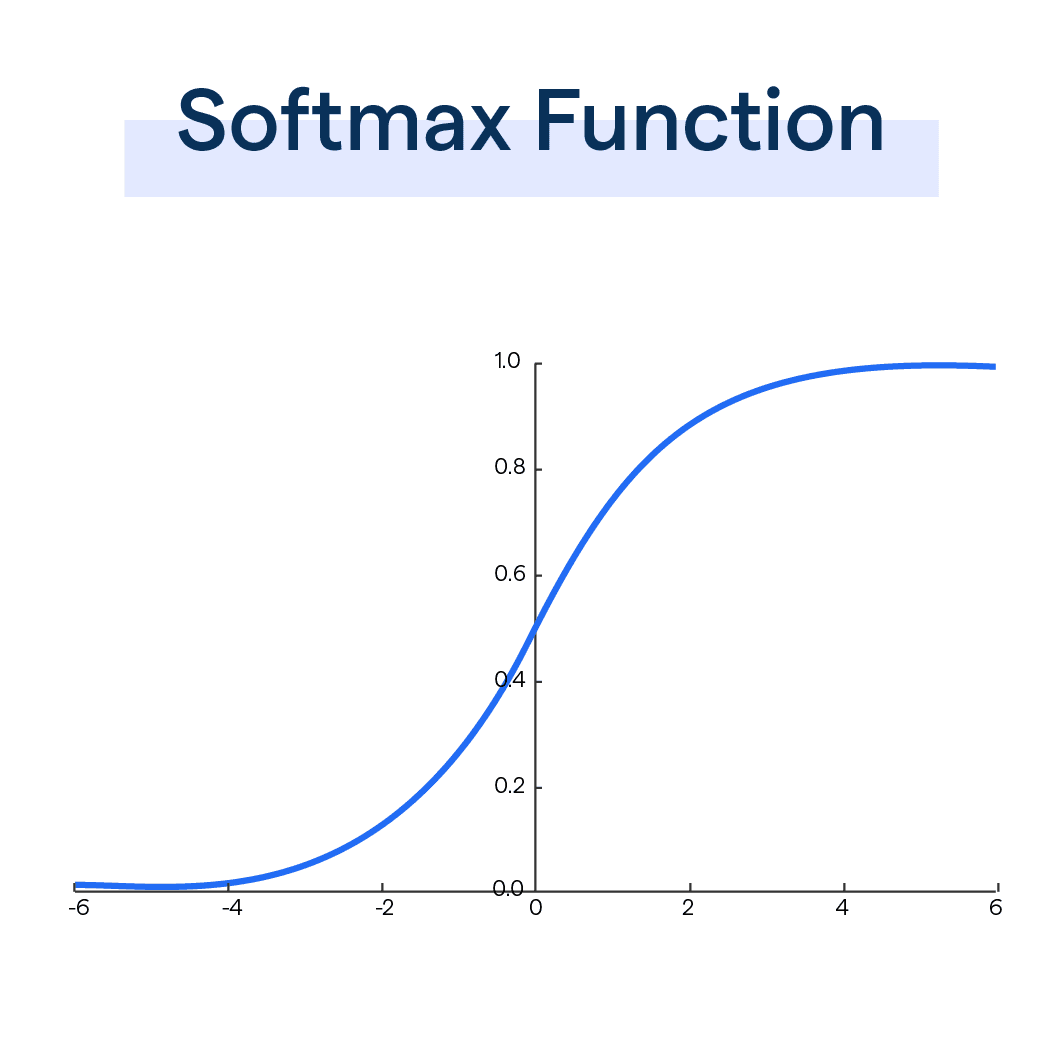

In [20]:
model.add(Dense(10, activation='softmax'))

神經網路就建好了!

### 3.3 組裝

要做 `compile` 才正式把神經網路建好<br>
還需要設幾件事:

- loss function
- 決定 optimizer
- 設 learning rate

為了一邊訓練一邊看到結果，加設

    metrics=['accuracy']


In [21]:
#model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy']) test1,2

對於分類問題，categorical_crossentropy 更合適，能更快收斂並提升準確率。
SGD 是經典但收斂慢，試試Adam

In [22]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

## 4. 檢視神經網路

可以用`model.summary()`檢視神經網路的架構, 可以確認一下是不是和想像的一樣

### 4.1 看 model 的 summary

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 35)             │        27,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 25)             │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,000 (121.09 KB)

 Trainable params: 31,000 (121.09 KB)

 Non-trainable params: 0 (0.00 B)

很快算算參數數目和想像是否是一樣

## 5. 訓練神經網路

現在要訓練的時候，這裡有3件事要決定:

- 一次要訓練幾筆資料 (`batch_size`), 就 150 筆調一次參數
- 這 6 萬筆資料一共要訓練幾次 (`epochs`), 訓練個 100 次
- (`val_loss`)重複>=幾次早停, ，避免過度訓練, 重複3次就早停

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [25]:
#model.fit(x_train, y_train, batch_size=100, epochs=50) test3

In [26]:
model.fit(x_train, y_train, batch_size=150, epochs=100)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6735 - loss: 1.0442
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9412 - loss: 0.2070
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9569 - loss: 0.1477
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9632 - loss: 0.1231
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9693 - loss: 0.1046
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9734 - loss: 0.0878
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0838
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.0751
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0685
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0637
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0572
Epoch 12/100
400/400 ━━━━━━━━━━━━━━━━━━━━

## 6. 結果

神經網路學習成果

In [27]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9639 - loss: 0.2392


In [28]:
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 96.89%


test1 測試資料正確率 86.31%<br>
test2 測試資料正確率 90.74%<br>
test3 測試資料正確率 96.60%<br>
test4 測試資料正確率 96.89%

`predict` 放的是神經網路的學習結果。做完之後用 `argmax` 找到數值最大的那一項。

In [29]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
predict

array([7, 2, 1, ..., 4, 5, 6])

 因為 `x_test` 每筆資料已經換成 784 維的向量, 所以要整型回 28x28 的矩陣才能當成圖形顯示出來

In [31]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [32]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

測試資料總可以給神經網路「總評量」

In [33]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - loss: 0.2392


In [34]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.19986744225025177
正確率 0.9689000248908997


test1:<br>
loss: 0.020268570631742477<br>
正確率 0.863099992275238<br>
<br>
test2:<br>
loss: 0.013836865313351154<br>
正確率 0.9074000120162964<br>
<br>
test3:<br>
loss: 0.18997877836227417<br>
正確率 0.9660000205039978<br>
<br>
test4:<br>
loss: 0.19986744225025177<br>
正確率 0.9689000248908997

### 7. 用 Gradio 來展示

In [35]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [36]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [37]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://307b4a98c472da029c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://307b4a98c472da029c.gradio.live


| test1 | 2 | 4 |
| ----- | ----- | ----- |
| 1 | 9 61% | 2 62% |
| 2 | 0 18% | 9 25% |
| 3 | 7 10% | 0 23% |
---
| test2 | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| 1 | 0 68% | 1 93% | 7 89% | 3 64% | 4 94% | 5 83% | 6 98% | 7 73% | 8 66% | 9 93% |
| 2 | 9 9% | 9 2% | 9 4% | 8 26% | 9 4% | 8 11% | 8 1% | 8 8% | 3 12% | 4 4% |
| 3 | 7 7% | 3 2% | 5 3% | 5 4% | 6 1% | 7 2% | 4 0% | 3 8% | 9 6% | 7 1% |
---
| test3 | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| 1 | 0 98% | 1 99% | 2 96% | 3 98% | 4 89% | 5 100% | 6 88% | 7 100% | 8 100% | 9 100% |
| 2 | 5 1% | 7 1% | 7 9% | 8 2% | 9 11% | 3 0% | 5 10% | 3 0% | 9 0% | 4 0% |
| 3 | 3 0% | 5 0% | 9 0% | 9 0% | 7 0% | 9 0% | 8 1% | 9 0% | 3 0% | 3 0% |
---
| test4 | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| 1 | 0 98% | 1 100% | 2 100% | 3 100% | 4 100% | 5 100% | 6 100% | 7 100% | 8 100% | 9 100% |
| 2 | 7 2% | 4 0% | 1 0% | 9 0% | 9 0% | 3 0% | 5 0% | 3 0% | 9 0% | 3 0% |
| 3 | 5 0% | 2 0% | 7 0% | 8 0% | 2 0% | 9 0% | 8 0% | 2 0% | 3 0% | 8 0% |

# 實驗報告

## 測試版本成效比較

| 測試版本 | 激活函數設計 | Optimizer | Loss Function | Batch / Epochs | 測試準確率 | 測試 Loss |
|----------|----------------|-----------|----------------|----------------|--------------|-------------|
| **test1** | 全部 ReLU | SGD | MSE | 100 / 10 | 86.31% | 0.0203 |
| **test2** | LeakyReLU + PReLU + ELU + SELU（每層指定 input_dim） | Adam | Categorical Crossentropy | 100 / 10 | 90.74% | 0.0138 |
| **test3** | 同 test2（移除重複 input_dim）+ EarlyStopping | Adam | Categorical Crossentropy | 100 / 50 | 96.60% | 0.1900 |
| **test4** | 同 test3 + 更大 batch、更長訓練 | Adam | Categorical Crossentropy | 150 / 100 | 96.89% | 0.1999 |

## 模型信心分布演進

###  test1：信心低且分散
- 多數預測信心在 60% 以下，容易誤判
- 例如：數字 9 → 61%、數字 2 → 62%

###  test2：信心提升但仍有混淆
- 多數預測達 90% 左右，但仍有誤判（如數字 8 被誤認為 3）
- 顯示激活函數混搭開始發揮效果

###  test3：信心集中且準確
- 多數預測達 98–100%，誤判比例極低
- EarlyStopping 幫助模型穩定收斂

###  test4：幾乎完美預測
- 所有數字預測信心達 100%，誤判樣本極少
- 更大的 batch size 與更長訓練週期進一步提升泛化能力

## 模型混淆分析：哪些數字彼此相似？

### 依據 Test2 的預測分布（準確率 90.74%）

以下是一些明顯的混淆情況：

| 真實數字 | 容易被誤判為 | 原因可能 |
|----------|----------------|------------|
| **8** | 3、9 | 結構相近，圓形筆劃多 |
| **9** | 4、8 | 上半部像 4，下半部像 8 |
| **5** | 3、7 | 筆劃開口相似，容易誤判 |
| **7** | 1、9 | 筆劃簡單，與 1、9 都有直線 |

---

### Test3 與 Test4 的預測分布（準確率 96.60% / 96.89%）

這兩組模型幾乎達到完美預測，但仍有少量混淆：

| 真實數字 | 誤判機率 | 被誤判為 |
|----------|-----------|------------|
| **2** | 9%（Test3） | 7、9 |
| **4** | 11%（Test3） | 9 |
| **6** | 10%（Test3） | 5 |
| **7** | 2%（Test4） | 4 |
| **3** | 0–2%（Test3/4） | 5、9 |

---

## 最常見的混淆對

綜合分析，以下幾組數字在模型中最容易彼此混淆：

- **8 vs 3 / 9**
- **9 vs 4 / 8**
- **5 vs 3 / 7**
- **2 vs 7 / 9**
- **6 vs 5**
- **7 vs 1 / 9**

這些混淆通常來自筆劃結構相似、手寫風格變異大，或是模型尚未充分學習邊界特徵。

## 觀察到的現象解析

### 左上角或左下角 → 預測成 **7**
- 以下圖1
- 手寫數字 7 常常是「一撇」在左上 + 一橫在中上
- 如果只寫在左上或左下，模型可能只看到「一撇」，就以為是 7

### 右上角或右下角 → 預測成 **5**
- 5 的上半部是右上角的弧形，下半部是右下角的鉤
- 如果只寫在右側，模型可能看到類似的局部特徵 → 誤判為 5

### 左下 + 右上 → 預測成 **3**
- 3 的筆劃是上下兩個弧形，分布在右上與左下
- 如果畫的圖剛好在這兩個區域有筆劃，模型可能「拼湊」成 3 的形狀

### 正中間一點 → 預測成 **8**
- 8 的中心常常有交疊或連接點
- 如果只有中間一點，模型可能誤以為是 8 的交界處


圖1:
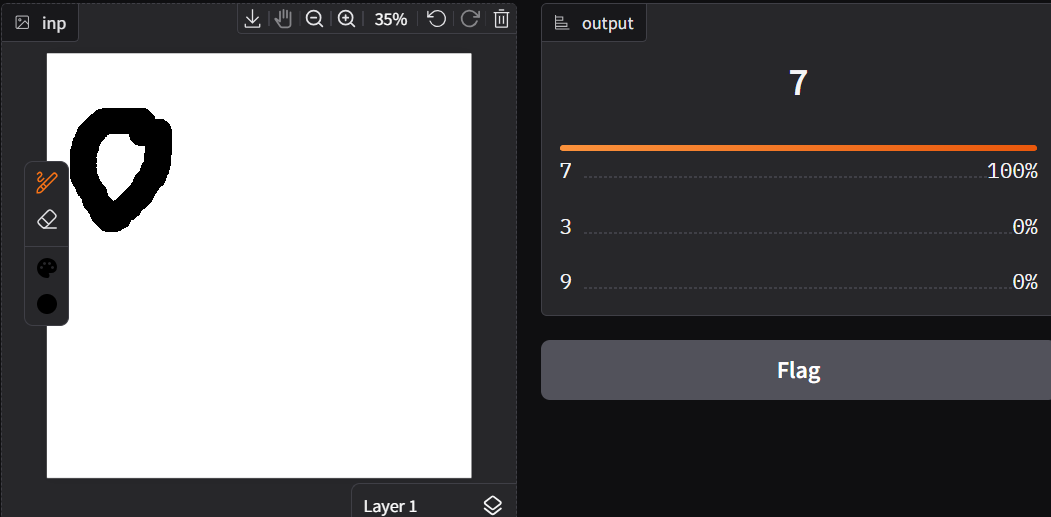